<center>
    <img src="./images/adsp_logo.png">
</center>

### Prof. Dr. -Ing. Gerald Schuller <br> Jupyter Notebook: Renato Profeta


# Sampling

In [1]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/jAdkpMC4ZGo" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

To see what happens when we sample a signal, lets start with the analog signal s(t). Sampling it means to sample the signal at sample intervals T (example: 1/8000 s in the ISDN example), or the sampling frequency $f_s$ (8kHz in the ISDN example). 

Mathematically, sampling can be formulated as multiplying the analog signal with a Dirac impulse at the sampling time instances nT, where n is the number of our sample (n=0,… for causal systems). 

In [2]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/_YclokYvRk4" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [3]:
# Imports
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from IPython.display import display, HTML

In [4]:
# Format local
CSS = """
.output {
    align-items: center;
}
"""
HTML('<style>{}</style>'.format(CSS))

<IPython.core.display.Javascript object>


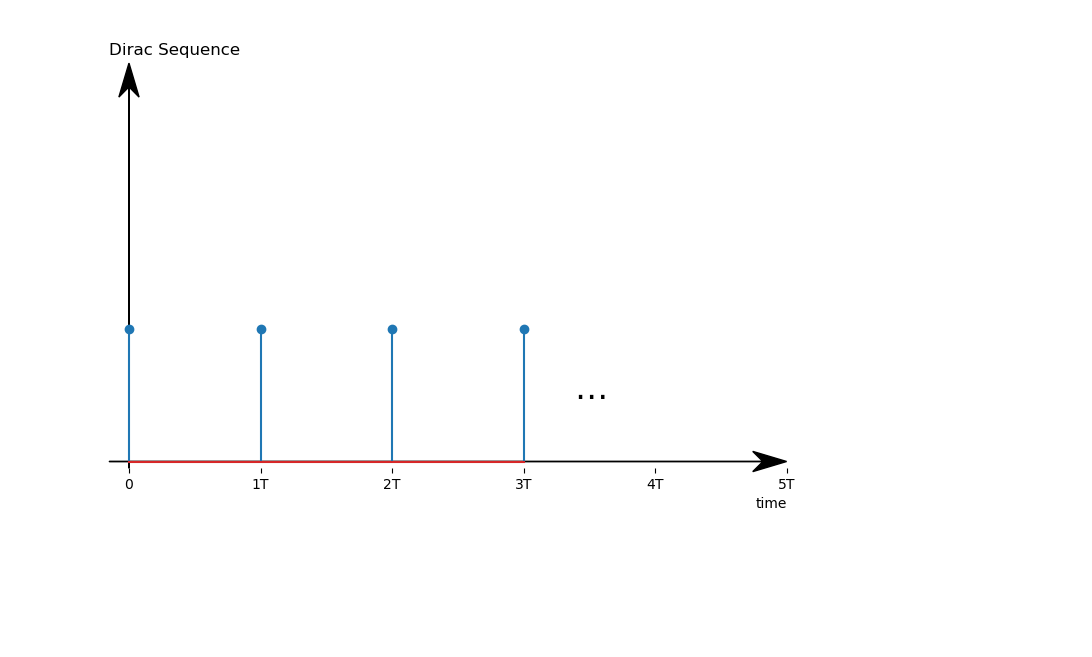

In [5]:

# Signal
dirac_sequence = np.ones(4)

# Plot
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
plt.stem(dirac_sequence, use_line_collection=True)
plt.xlim(right=5)
plt.ylim(top=3)
plt.yticks([])
plt.title('Dirac Sequence', loc='left')
plt.xlabel('time', horizontalalignment='right', x=1.0)
xmin, xmax = ax.get_xlim() 
ymin, ymax = ax.get_ylim()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}T'.format(val) if val !=0 else '0'
))

# Arrowed Axis

for side in ['bottom','right','top','left']:
    ax.spines[side].set_visible(False)
    

dps = fig.dpi_scale_trans.inverted()
bbox = ax.get_window_extent().transformed(dps)
width, height = bbox.width, bbox.height
 

hw = 1./20.*(ymax-ymin) 
hl = 1./20.*(xmax-xmin)
lw = 1. 
ohg = 0.3 
 
yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height
 
ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
         head_width=hw, head_length=hl, overhang = ohg, 
         length_includes_head= True, clip_on = False) 
 
ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
         head_width=yhw, head_length=yhl, overhang = ohg, 
         length_includes_head= True, clip_on = False) 
 
# Annotation
plt.text(3.5, 0.5, r'$\cdots$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center'});


The sequence or train of Dirac impulses can be written as:
<br>
$$ \large
\Delta _{T}(t):= \sum_{n=0} ^\infty \delta(t-nT) $$
<br>
Remember that the integral over a Dirac impulse is 1:<br>
$$\int _{t=-\infty} ^\infty \delta(t) dt=1$$

The integral over the product of a function with a Dirac impulse is the value of the function at the position of the impulse:

$$ \large
\begin{equation} \int_{t=-\infty} ^\infty s(t) \delta(t-nT)dt = s(nT)\end{equation}$$ 

This is the mathematical formulation of sampling at time-point nT. We can now use this description to compute the resulting **spectrum** with the **Fourier transform**.

In [6]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/9wODoG_H-jg" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

First, if we look at the Fourier transform of the analog signal or system, we get<br>

$$ {S ^{c} }  ( ω ) = \int _{ {t= -  \infty } }^ { { \infty } }  {s ( t )  \cdot e ^{{ - jωt} }  dt} $$

where the superscript c denote the continuous version, with $w=2\pi f$ the angular frequency. If we now compute the Fourier Transform for the sampled signal $s(t)\cdot \Delta _T (t)$, with the replacement
<br>
 $$s(t) \leftarrow s(t) \cdot \Delta_T(t)$$
 
 we obtain the following sum (since only at the sampling time instances the integral is non-zero, as we see in eq. (1)),<br>
 $$
 {S ^{d} }  ( ω ) = \sum _{ {n= -  \infty } } ^ { { \infty } }  {s (  nT)  \cdot e ^{ { - jω nT} } }  
 $$
<br>
with the superscript d now denoting the discrete time version. Now we can see that the frequency variable only appears as $wnT$, and T is the inverse of the sampling frequency. Hence we get
<br>
$$\omega T=\frac{\omega}{f_s}=:\Omega $$

This is now our **normalized frequency**, it is without a physical unit, since the unit Hertz in $\omega$ and $f_s$ cancel. In the normalized frequency $2\pi$ represents the sampling frequency and $\pi$ is the so called **Nyquist frequency** (the upper limit of our usable frequency range, defined as **half** the sampling frequency). 

Observe that we use the capital $\Omega$ to signify that this is the normalized frequency. The capitalized version is commonly used to distinguish it from the continuous, non-normalized, version, if both are used. Otherwise, also the small $\omega$ is used in the literature, for the normalized frequency, if that is all we need, if there is no danger of confusion, as we did before. 

To convert a normalized frequency back to the non-normalized one, we simply multiply it with the sampling frequency: $\omega=\Omega \cdot f_s$.

To indicate that we are now in the discrete domain, we rename our signal to x(n)=s(nT).

Its spectrum or frequency response is then
$$
X(\Omega)=\sum_{n=-\infty}^\infty x(n)e^{-j\Omega n}
$$

We call this the **“Discrete Time Fourier Transform” (DTFT)**, because we apply it to discrete time signals x(n). This can be distinguished from the Discrete Fourier Transform, because the above time signal has infinite length.

Because n is integer here (no longer real valued like t), we get a $2\pi$ **periodicity** for $X(\Omega)$. This is the first important property for discrete time signals. 

In [30]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/qqbWmiwMC3Q" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

<IPython.core.display.Javascript object>


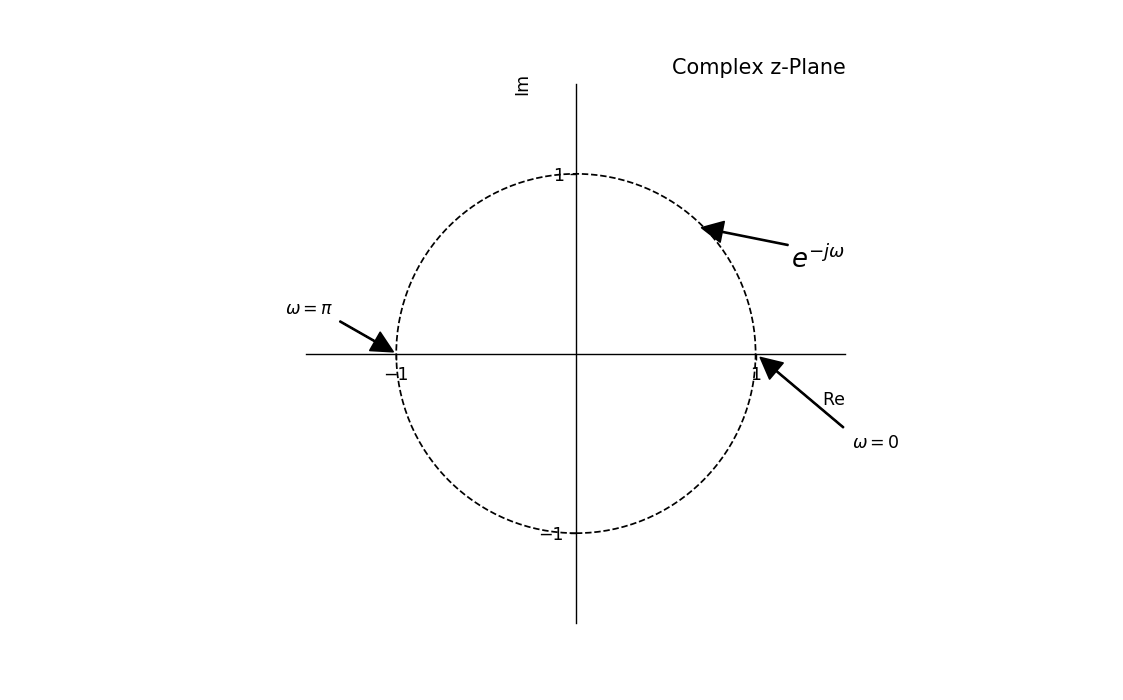

In [32]:
# Plot Poles and Zeros
from  matplotlib import patches
plt.figure(figsize=(10,6))
ax = plt.subplot(111)
r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
ticks = [-1, 1]; plt.xticks(ticks); plt.yticks(ticks)
# Unit Circle
uc = patches.Circle((0,0), radius=1, fill=False, color='black', ls='dashed')
ax.add_patch(uc)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('Re', horizontalalignment='right', x=1.0)
plt.ylabel('Im',  y=1.0)
plt.title('Complex z-Plane', loc='right')
# Annotations
ax.annotate('$\omega=0$', xy=(1, 0),  xycoords='data',
            xytext=(1.1, 0.35), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05, width=0.5),
            horizontalalignment='right', verticalalignment='top',
            )
ax.annotate('$\omega=\pi$', xy=(-1, 0),  xycoords='data',
            xytext=(0.05, 0.6), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05, width=0.5),
            horizontalalignment='right', verticalalignment='top',
            )
ax.annotate('$e^{-j\omega}$', xy=(0.7, 0.7),  xycoords='data',
            xytext=(1, 0.7), textcoords='axes fraction', size=15,
            arrowprops=dict(facecolor='black', width=0.5),
            horizontalalignment='right', verticalalignment='top',
            );

Here we can see that in general we obtain a $2\pi$ periodicity in the frequency domain, because of the $2\pi$ periodicity of the exponential function $e^{jw}$.

Also observe that for **real valued** signals, the spectrum of the negative frequencies is the conjugate complex of the positive frequencies,

$$
X(-\Omega)=X^*(\Omega)
$$

where * denotes the conjugate complex operation, because in our DTFT, $e^{-j(-\Omega )n}=(e^{-j\Omega n})^*$.

(we also have to use the fact that the conjugate complex of a real valued signal does not change it, to draw the conjugation out of the Fourier sum).

This also means that for real valued signals we only need to look at the frequency range between 0 and $\pi$, since the negative frequencies are conjugate symmetric (and because of the 2pi periodicity the range between -pi and pi is sufficient to look at). This is also again what the Nyquist Theorem tells us, that the frequencies between 0 and $\pi$ (the Nyquist frequency) are sufficient to completely describe a (real valued) signal.

## Sampling a Discrete Time Signal

In [40]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/uZFKOUfibt4" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

So what happens if we further downsample an already discrete signal x(n), to reduce its sampling rate?

**Downsampling by N** means we only keep every Nth sample and discard every sample in between. Observe that this results in a **normalized frequency which is a factor of N higher**.

This downsampling process can also be seen as first multiplying the signal with a sequence of **unit pulses** (a 1 at each sample position), zeros in between, and later dropping the zeros. This multiplication with the unit pulse train can now be used to mathematically analyse this downsampling, looking at the resulting spectra, first still including the zeros. The frequency response now becomes


$$\large X^d(\Omega)=\sum_{n=mN} x(n)e^{-j \Omega n}$$
$$\large =\sum_{m=- \infty}^ \infty x(mN)e^{-j \Omega mN}$$
for all integers m.

Again we can write down-sampling as a multiplication of the signal with a sampling function. In continuous time it was the sequence of Dirac impulses, here it is a **sequence of unit pulses** at positions of multiples of N,

$$ \Delta_N ( n ) = \left ( \matrix {{1 , if n = m N} \\ {0 , e l s e}} \right) $$

Then the sampled signal, with the zeros still in it, becomes

$$x^d(n)=x(n)\Delta _N (n)$$

This signal is now an intermediate signal, which gets the zeros removed before transmission or storage, to reduce the needed data rate. The decoder upsamples it by re-inserting the zeros to obtain the original sampling rate.

Observe that this is then also the signal  that we obtain after this upsampling in the decoder. Hence this signal looks interesting to us, because it appears in the encoder and also in the decoder.


What does its **spectrum or frequency response** look like?

We saw that the downsampled signal $x^d(n)$ can be written as the **multiplication** of the original signal with the unit pulse train $\Delta_N (n)$. In the spectrum or frequency domain this becomes a **convolution with their Fourier transforms**. 

The Fourier transform of the unit pulse train is a dirac impulse train. But that is not so easy to derive, so we just apply a simple trick, to make it mathematically more easy and get converging sums.  We have a **guess** what the Fourier transform of the unit pulse train is: we get Dirac impulses at frequencies of $\frac{2\pi}{N}k$ (fundamental frequency $2 \pi / N$ and its harmonics). The fundamental (angular) frequency is $2 \pi / N$, because our original sampling frequency was $2 \pi$, and now we reduced it by a factor N.

With a constant factor that becomes clear later, we get our guess to

$$ \large
\delta_{\frac{2\pi}{N}} \left ( Ω \right )=\sum_{ k=0 } ^ { N-1 } \frac{2 \pi} { N} \delta( \Omega-\frac{2 \pi}{N} \cdot k)
$$

Where $\delta_{2\pi/N} \left ( Ω \right )$ is (guessed to be) the Fourier transform of the unit impulse train (the Dirac impulse train). We just need to verify it. Its **inverse Discrete Time Fourier Transform** is

$$\large
\Delta_N \left ( n \right )  =\frac{1}  {2 π}  \int _ 0^ {2 π} {\delta_{2\pi/N} \left ( Ω \right )  e^{j n Ω} d Ω}$$

$$\large
=\frac{1}  {2 π}  \int_ 0 ^{2 π} \sum_ { k=0 } ^ { N-1 } \frac{2 \pi} { N} \delta( \Omega-\frac{2 \pi}{N }\cdot k ) e^{jn\Omega} d\Omega    
$$


$$\large
=\frac{1}{N}  \sum_{k = 0}^ {N - 1} e^{j \frac{2 π} {N} \cdot k \cdot n}$$

Now we have to prove that this is indeed our unit pulse train. To do that, we can look at the sum. It is a geometric sum (a sum over a constant with the summation index in the exponent),

$S= \sum _{k = 0} ^ {N - 1} c^k$ , $S \cdot c = \sum _{k = 1} ^ N c^k$ , $S c -S =c^N -1$, hence we get

$$S =\frac{c^N - 1}  {c - 1}$$

Here we get $c=e^{j\frac {2 \pi}{N}n}$, and the sum can hence be computed in a closed form,

$$ \large
 \sum _{k = 0}^{N - 1} {e^{j \frac{2 π} { N} \cdot n \cdot k} } =\frac{e^{j \frac{2  π} { N} \cdot n \cdot N} - 1}  {e^{j \frac{2  π} {N }\cdot n} - 1}
$$

In order to get our unit pulse train, this sum must become N for n=mN. We can check this by simply plugging this into the sum. The right part of the sum is undefined in this case (0/0), but we get an easy result by looking at the left hand side: $e^{j \frac{2 π}{N} \cdot m N \cdot k} =1$. Hence the sum becomes N, as desired!<br>
For $n  \neq m N$ we need the sum to be zero. Here we can now use the right hand side of our equation. The denominator is unequal zero, and the numerator becomes zero, and hence the sum is indeed zero, as needed!

This proves that our **assumption was right**, and we have

$$\large
\Delta_N \left ( n \right ) =\frac{1}{ N } \sum _{k = 0} ^ {N - 1} e^{j \frac{2 π} {N} \cdot k \cdot n}$$<br>

In [41]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/KeT2i-ARZ7c" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Now we can use this expression for the unit pulse train in the time domain and compute the Fourier transform,

$$\large
x^d \left ( n \right )  =x \left ( n \right )  \cdot \Delta_N \left ( n \right ) $$$$ =x  ( n  ) \cdot \frac{1}{N}  \sum _ {k = 0} ^{N - 1} e^{j \frac{2 π} {N} \cdot k \cdot n}
$$

Taking its Discrete Time Fourier transform now results in

$$\large
X^d \left ( Ω \right )  = \sum _ {n = - ∞} ^ ∞ {x  (  n  ) \cdot} \frac{1}{ N}  \sum _ {k = 0} ^{N - 1} e^{j \frac{2π}{ N}\cdot k \cdot n} \cdot e^{- j Ω n} = $$

$$\large
=\frac{1} { N}  \sum _ {k = 0}^ {N - 1}\sum _{n=-\infty}^{\infty} {x  ( n )\cdot e^{-j(- \frac{2\pi}{N}\cdot k +\Omega)}}$$

$$\large
=\frac{1} {N}  \sum _{k = 0} ^{N - 1} {X  (  - \frac{2 π}{ N} k + Ω  )}
$$

This shows, that sampling, still including the zeros, leads (in the frequency domain) to **multiple shifted versions** of the signal spectrum, the so-called **aliasing components**,


$$\large
X^d (\Omega)= \frac{1} {N} \sum _{k=0} ^{N-1} X(- \frac{2 \pi}{N} \cdot k + \Omega)$$
<center>
    <img src='./images/aliasing_components.PNG'>
</center>


**Observe:** The aliasing components **periodify** the spectrum now according to the **new sampling rate**, which is 1/N of the old sampling rate, hence the new period is 1/N the old period (of $2 \pi$).

**Observe:** The spectral components don't overlap if their bandwidths are below $\dfrac {2\pi}{N}$ for complex signals, or for a real low pass signal, it should be below $ \dfrac{\pi}{N}$! If we want to reconstruct the original signal, hence we need to make sure the aliasing components don't overlap by suitable filtering at the high sampling rate, to prepare for the down-sampling. Observe that the term „Aliasing“ in the literature is sometime only used for overlapping alias components, and sometimes more broadly, like we do here, to mean any additional shifted frequency component.

Next is an **example**, also including the negative frequencies that now show up above normalized frequency 1 (**1** being the Nyquist frequency here), and showing 2 sine signals at different strength at normalized frequencies 0.4 and 0.35. This can also be seen as a narrow band signal, resulting e.g. from a passband filter.

In [42]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/sB5HRZgqgIg" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [33]:
# Signal Processing Parameters
Fs = 32000
T=1/Fs
t = np.arange(Fs//32)*T

# Signals
w35 = 0.35*Fs/2
sine_35 = np.sin(2*np.pi*w35*t)
w40 = 0.4*Fs/2
sine_40 = 100*np.sin(2*np.pi*w40*t)
signal=sine_35+sine_40

# FFT
from numpy.fft import fft
signal_fft = fft(signal)
freqs = np.fft.fftshift(np.fft.fftfreq(signal.size,d=T))+Fs/2

<IPython.core.display.Javascript object>


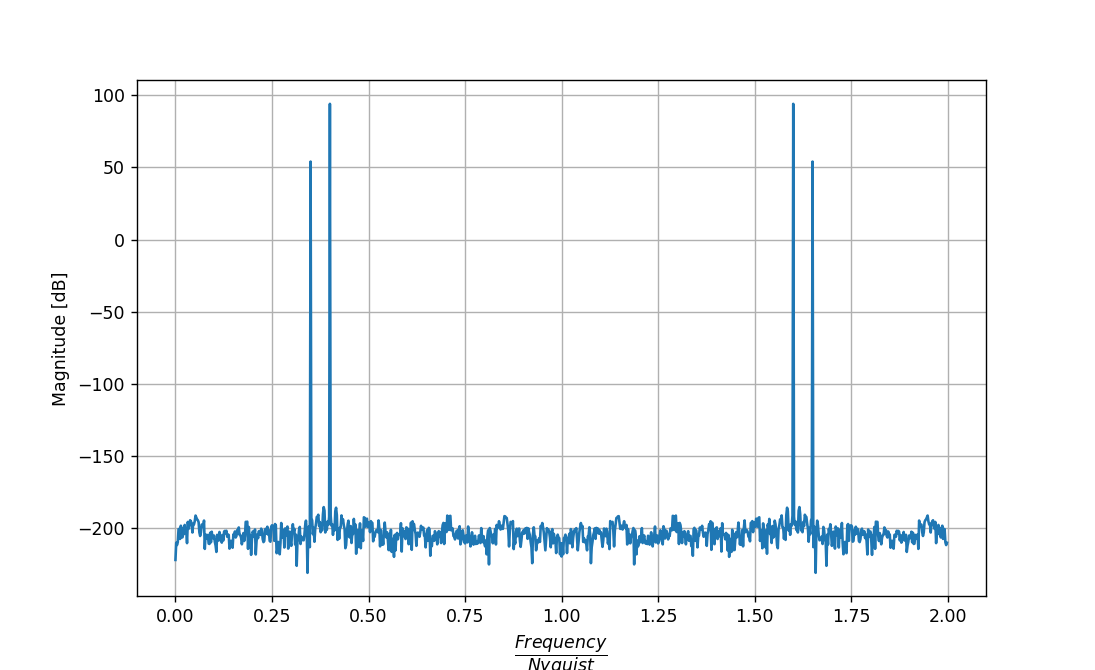

In [34]:
plt.figure(figsize=(10,6))
plt.plot(freqs/(Fs/2),20*np.log10(np.abs(signal_fft)))
plt.grid()
plt.ylabel('Magnitude [dB]')
plt.xlabel(r'$\dfrac{Frequency}{Nyquist}$');

After sampling by a factor of N=4, still including the zeros, we get the following spectrum

In [35]:
unit = np.zeros(Fs//32)
unit[::4]=1
signal_downsampled = signal*unit

In [36]:
signal_ds_fft = fft(signal_downsampled)

<IPython.core.display.Javascript object>


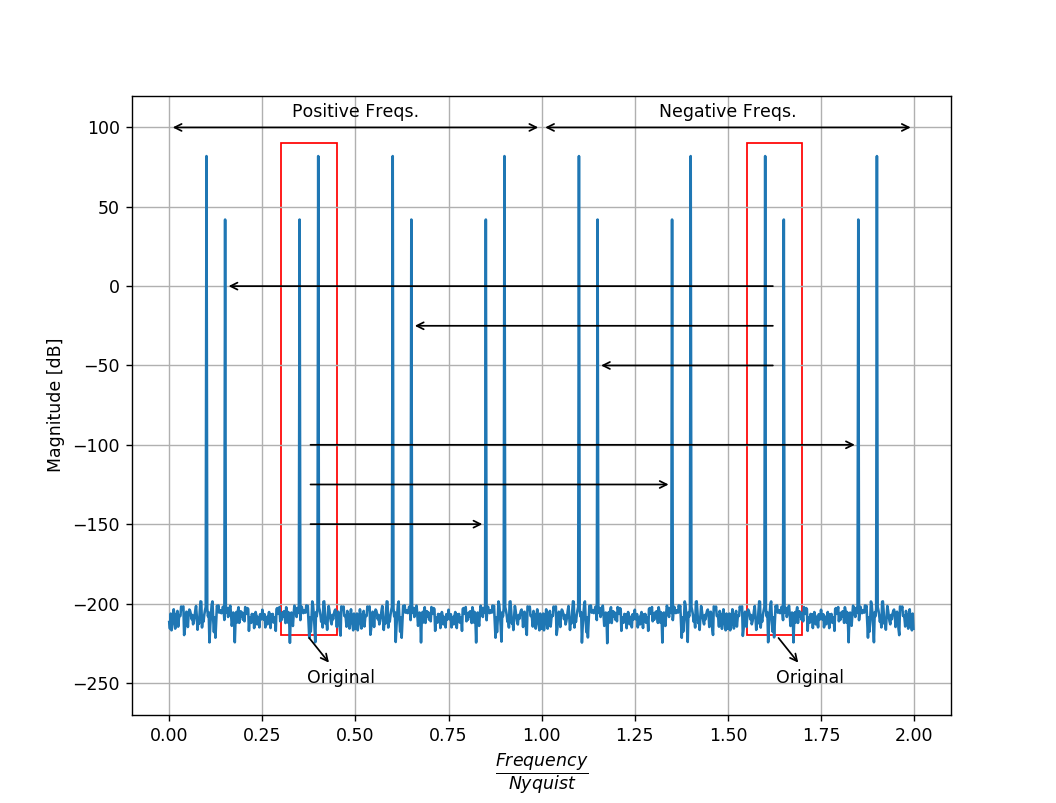

In [37]:
from matplotlib.patches import Rectangle

plt.figure(figsize=(12,8))
plt.plot(freqs/(Fs/2),20*np.log10(np.abs(signal_ds_fft)))
plt.grid()
plt.ylabel('Magnitude [dB]')
plt.xlabel(r'$\dfrac{Frequency}{Nyquist}$')
plt.ylim((-270,120))

# Annotations
plt.annotate(s='', xy=(0,100), xytext=(1,100), arrowprops=dict(arrowstyle='<->'))
plt.text(0.5, 110, 'Positive Freqs.', horizontalalignment='center', verticalalignment='center')

plt.annotate(s='', xy=(1,100), xytext=(2,100), arrowprops=dict(arrowstyle='<->'))
plt.text(1.5, 110, 'Negative Freqs.', horizontalalignment='center', verticalalignment='center')

ax = plt.gca()
rect = Rectangle((0.3,-220),0.15,310,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
rect = Rectangle((1.55,-220),0.15,310,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)

plt.annotate(s='', xy=(0.37,-150), xytext=(0.85,-150), arrowprops=dict(arrowstyle='<-'))
plt.annotate(s='', xy=(0.37,-125), xytext=(1.35,-125), arrowprops=dict(arrowstyle='<-'))
plt.annotate(s='', xy=(0.37,-100), xytext=(1.85,-100), arrowprops=dict(arrowstyle='<-'))

plt.annotate(s='', xy=(1.63,-50), xytext=(1.15,-50), arrowprops=dict(arrowstyle='<-'))
plt.annotate(s='', xy=(1.63,-25), xytext=(0.65,-25), arrowprops=dict(arrowstyle='<-'))
plt.annotate(s='', xy=(1.63,0), xytext=(0.15,0), arrowprops=dict(arrowstyle='<-'))

plt.annotate(s='Original', xy=(0.37,-220), xytext=(0.37,-250), arrowprops=dict(arrowstyle='<-'))
plt.annotate(s='Original', xy=(1.63,-220), xytext=(1.63,-250), arrowprops=dict(arrowstyle='<-'));

The picture shows that the spectrum still contains the **original spectrum, plus** the spectral **copies** at frequency shifts of $k\cdot \dfrac{ 2 \cdot \pi}{N}$ from the originals.

**Observe:** Since we have a real valued signal (the sinusoids), the spectrum of negative and positive frequencies are **symmetric** around frequency zero. This then leads to the **mirrored appearance** between the neighbouring spectral images or aliasing components.

Nyquist tells us to sample in such a way, that the shifted spectra of our signal do not overlap. Otherwise, if they overlap, we cannot separate those parts of the spectrum anymore, and we loose information, which we cannot reconstruct.

**In conclusion:** Sampling a signal by a factor of N, with keeping the zeros between the sample points, leads to N-1 aliasing components or spectral copies.

**Example:**

Make a sine wave which at 44100 Hz sampling rate has a frequency of 400 Hz at 1 second duration. Hence we need 44100 samples, and 400 periods of our sinusoid in this second. Hence we can write our signal in Python as:

In [43]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/GpiB5cDa5to" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [8]:
import numpy as np
fs = 44100
f = 400.0
s=np.sin(2*np.pi*f*np.arange(0,1,1.0/fs))
Omega = 2*np.pi*f/fs
s1=np.sin(Omega*np.arange(0,fs,1))

In [9]:
import IPython.display as ipd
display(ipd.Audio(s, rate=fs))

<IPython.core.display.Javascript object>


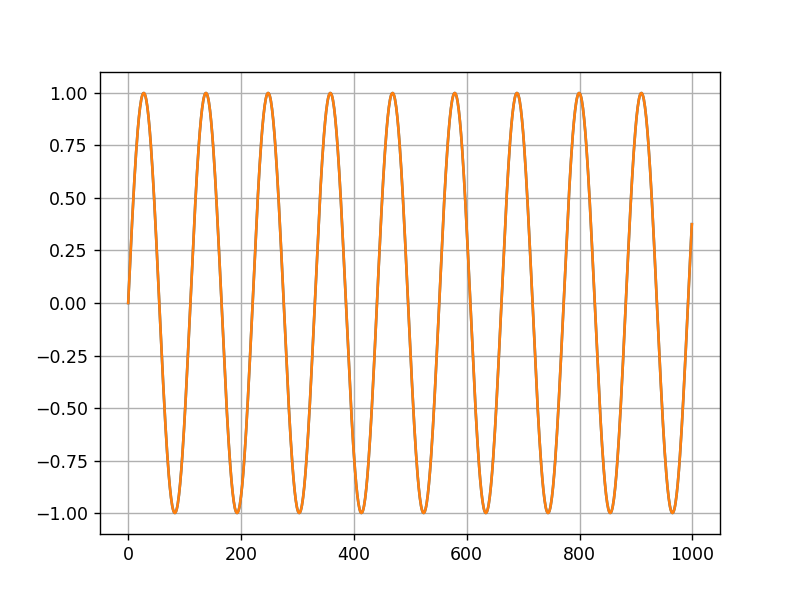

In [10]:
# Plot the first 1000 samples
plt.figure()
plt.plot(s[0:1000])
plt.plot(s1[0:1000])
plt.grid()

Now we can multiply this sine tone signal with a unit pulse train, with N=8.
We generate the unit impulse train,

<IPython.core.display.Javascript object>


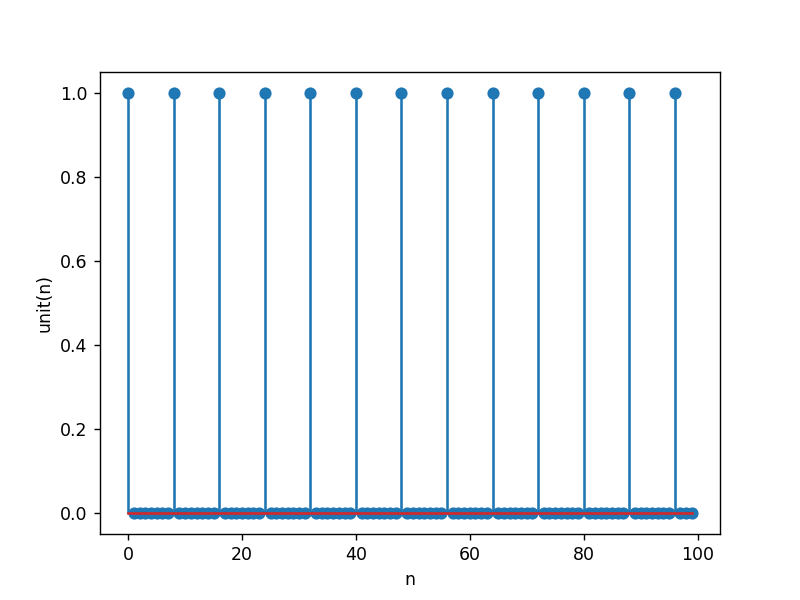

In [38]:
unit = np.zeros(44100)
unit[0::8] = 1
plt.figure()
plt.stem(unit[0:100], use_line_collection=True)
plt.xlabel('n')
plt.ylabel('unit(n)');

In [12]:
ipd.Audio(unit,rate=44100)

 The multiplication with the unit impulse train:

In [13]:
sdu=s*unit

(This multiplication is also called „frequency mixing“).
Now plot the result, the first 100 samples:

<IPython.core.display.Javascript object>


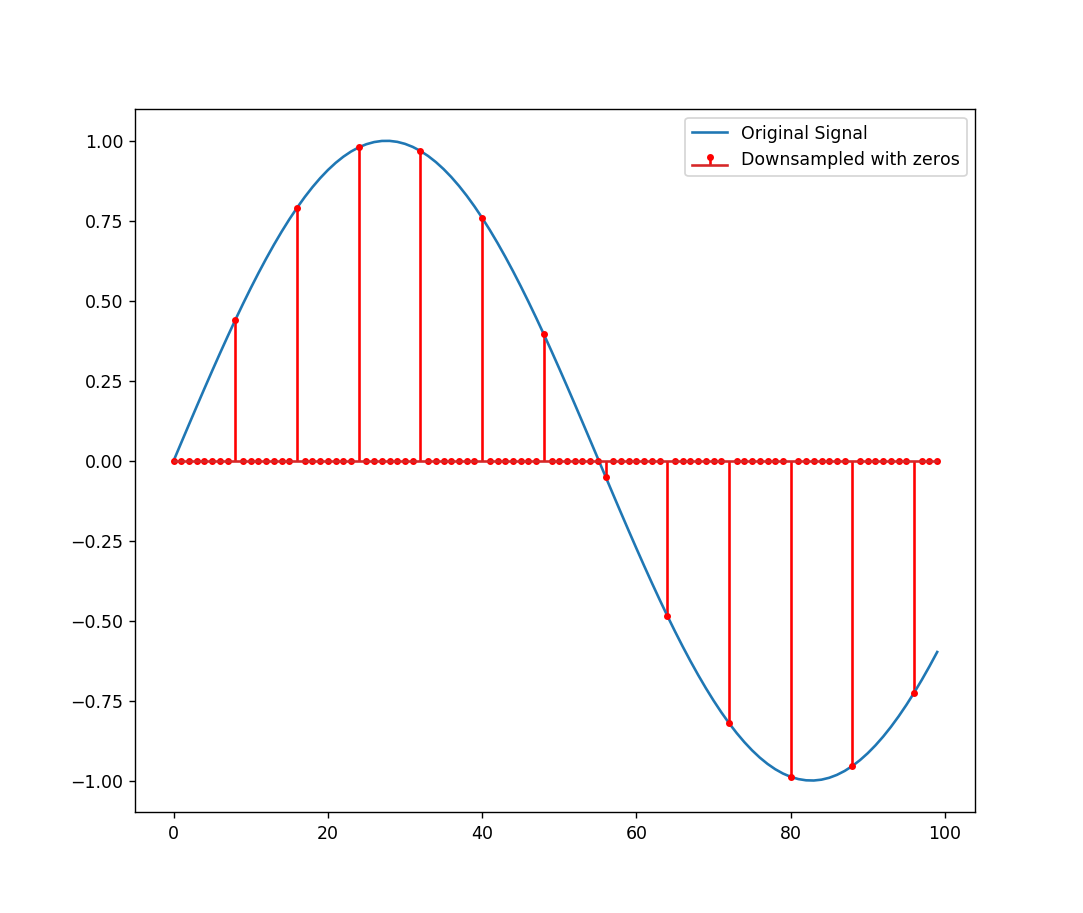

In [14]:
plt.figure(figsize=(10,8))
plt.plot(s[0:100], label='Original Signal')
plt.stem(sdu[0:100],linefmt='r',markerfmt='r.', use_line_collection=True, label='Downsampled with zeros')
plt.legend();

This is our signal still with the zeros in it.
Now take a look at the magnitude spectrum (in dB) of the original signal s:

<IPython.core.display.Javascript object>


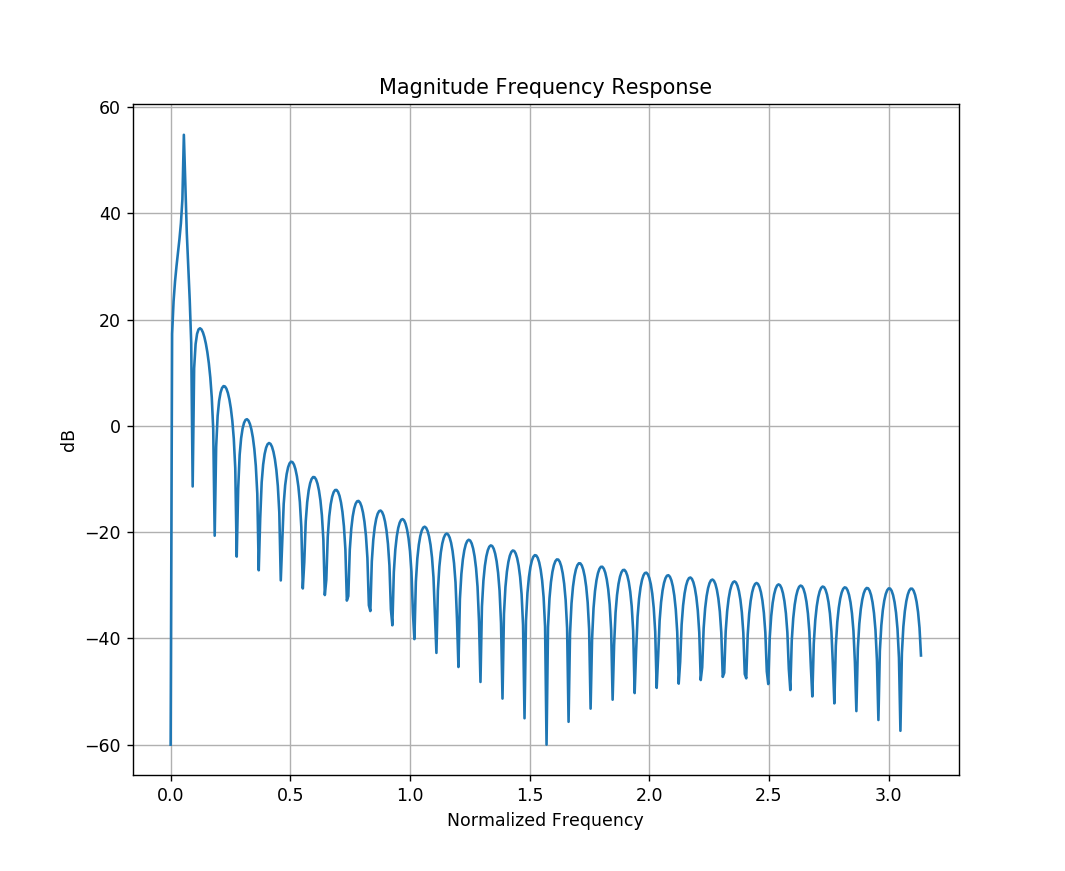

In [15]:
from scipy.signal import freqz
w,H=freqz(s)
plt.figure(figsize=(10,8))
plt.plot(w, 20*np.log10(abs(H)+1e-3))
plt.xlabel('Normalized Frequency')
plt.ylabel('dB')
plt.title('Magnitude Frequency Response')
plt.grid()

The plot shows the magnitude of the frequency spectrum of our signal. Observe that the frequency axis (horizontal) is a *normalized* frequency, normalized to the Nyquist frequency as $\pi$, in our case 22050 Hz. Hence our sinusoid should appear as a peak at normalized frequency 400.0/22050*pi=0.05699, which we indeed see.
 
Now we can compare this to our signal with the zeros, sdu:

<IPython.core.display.Javascript object>


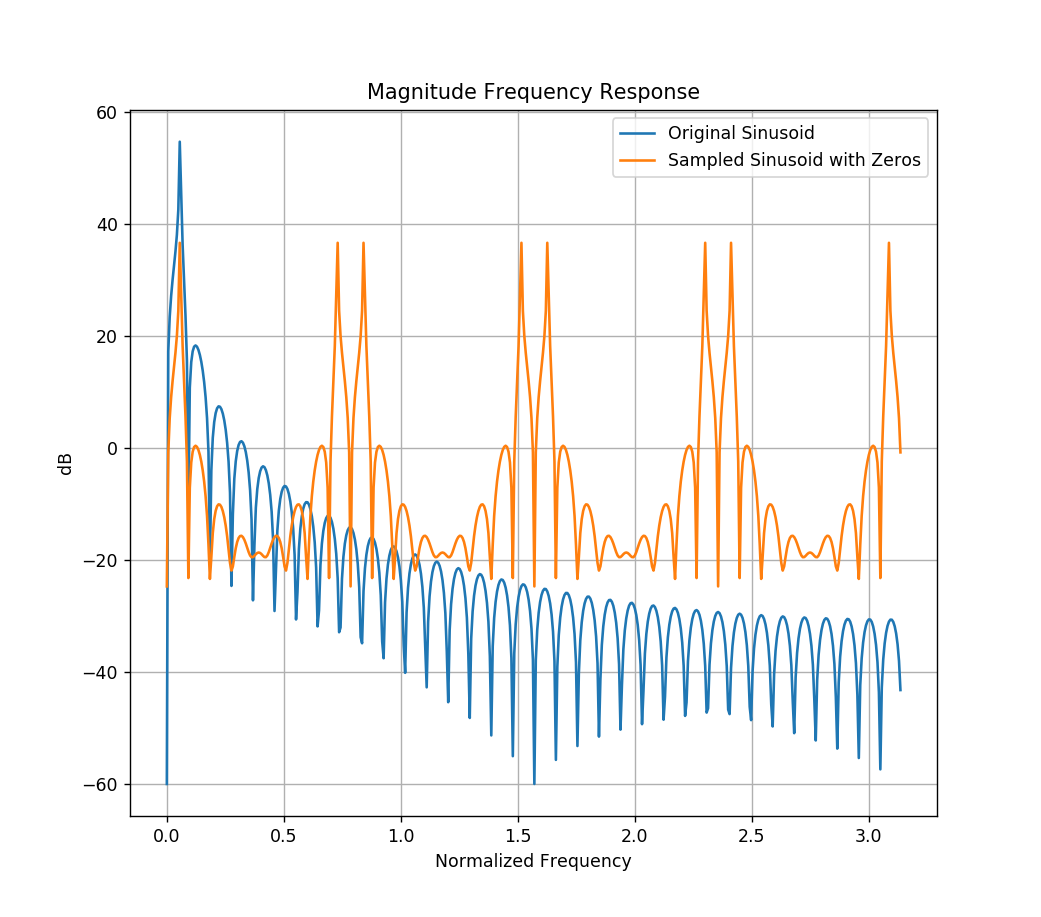

In [16]:
plt.figure(figsize=(10,8))
w,H=freqz(s)
plt.plot(w, 20*np.log10(abs(H)+1e-3))
plt.xlabel('Normalized Frequency')
plt.ylabel('dB')
plt.title('Magnitude Frequency Response')

w,H=freqz(sdu)
plt.plot(w, 20*np.log10(abs(H)+1e-3))
plt.legend(('Original Sinusoid','Sampled Sinusoid with Zeros'))
plt.grid();

Here we can see the original line of our 400 Hz tone, and now also the 7 new aliasing components. Observe that always 2 aliasing components are close together. This is because the original 400 Hz tone also has a spectral peak at the negative frequencies, at -400 Hz, or at normalized frequency -0.05699.

Now also listen to the signal with the zeros:

In [17]:
ipd.Audio(sdu,rate=44100)

### Real-Time Python Example

Here you can hear that it sounds quite different from the original, because of the strong aliasing components!
 
**Python** real time audio **example**: This example takes the microphone input and samples it, without removing the zeros, and plays it back the the speaker in real time.

It constructs a unit pulse train, with a 1 at every N'th sample, using the modulus function „%“, 

```s=(np.arange(0,CHUNK)%N)==0```

In [44]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/hbIQOeD4N2k" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [18]:
"""
PyAudio Example: Make a sampling between input and output 
(i.e., record a few samples, multiply them with a unit pulse train,
and play them back immediately).
Using block-wise processing instead of a for loop
Gerald Schuller, Octtober 2014

Updated and Ported to Jupyter Notebooks by: Renato Profeta, November 2019
Using PyAudio Callback Mode, Matplolib
"""

import time
import numpy as np
from pyaudio import PyAudio, paFloat32, paContinue, paInt16, paComplete
from ipywidgets import ToggleButton, Checkbox
import threading

sampling_on=False

button_stop= ToggleButton(description='Stop')
box_sampling = Checkbox(False, description='Downsampling with Zeros')

def on_button_stop(change):
    if change['new']==True:
        stream.stop_stream()
        stream.close()
        pa.terminate()
        button_stop.disabled=True
        print('PyAudio terminated...')
button_stop.observe(on_button_stop, 'value')
display(button_stop)

def box_sampling_changed(box_sampling):
    global SamplingOn
    if box_sampling['new']: 
        SamplingOn=True
    else:
        SamplingOn=False       
box_sampling.observe(box_sampling_changed, names='value')
display(box_sampling)

N=8
s=(np.arange(0,1024)%N)==0
SamplingOn=False


def callback(in_data, frame_count, time_info, flag):
    global SamplingOn
    audio_data = np.frombuffer(in_data, dtype=np.int16)
    audio_data_s = audio_data
    if SamplingOn:
        audio_data_s=audio_data*s
    if button_stop.value==True:
        return (audio_data_s, paComplete)
    return (audio_data_s, paContinue)

pa = PyAudio()

stream = pa.open(format = paInt16,
                 channels = 1,
                 rate = 44100,
                 output = True,
                 input = True,
                 frames_per_buffer = 1024,
                 stream_callback = callback)


def keep_alive(button_stop):
    while stream.is_active():
        if button_stop.value==True:
            break
        time.sleep(0.1)

# Create a Thread for run_spectrogram function
thread = threading.Thread(target=keep_alive, args=(button_stop,))
stream.start_stream()
thread.start()

ToggleButton(value=False, description='Stop')

Checkbox(value=False, description='Downsampling with Zeros')

PyAudio terminated...


## Removing the Zeros

The final step of downsampling is now to omit the zeros between the samples, to obtain the lower sampling rate. Let's call the signal without the zeros  $y(m)$ where the time index m denotes the **lower sampling rate** (as opposed to n, which denotes the higher sampling rate). 

In our Python example this is:

In [45]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/XGKfAm1-Mek" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

<IPython.core.display.Javascript object>


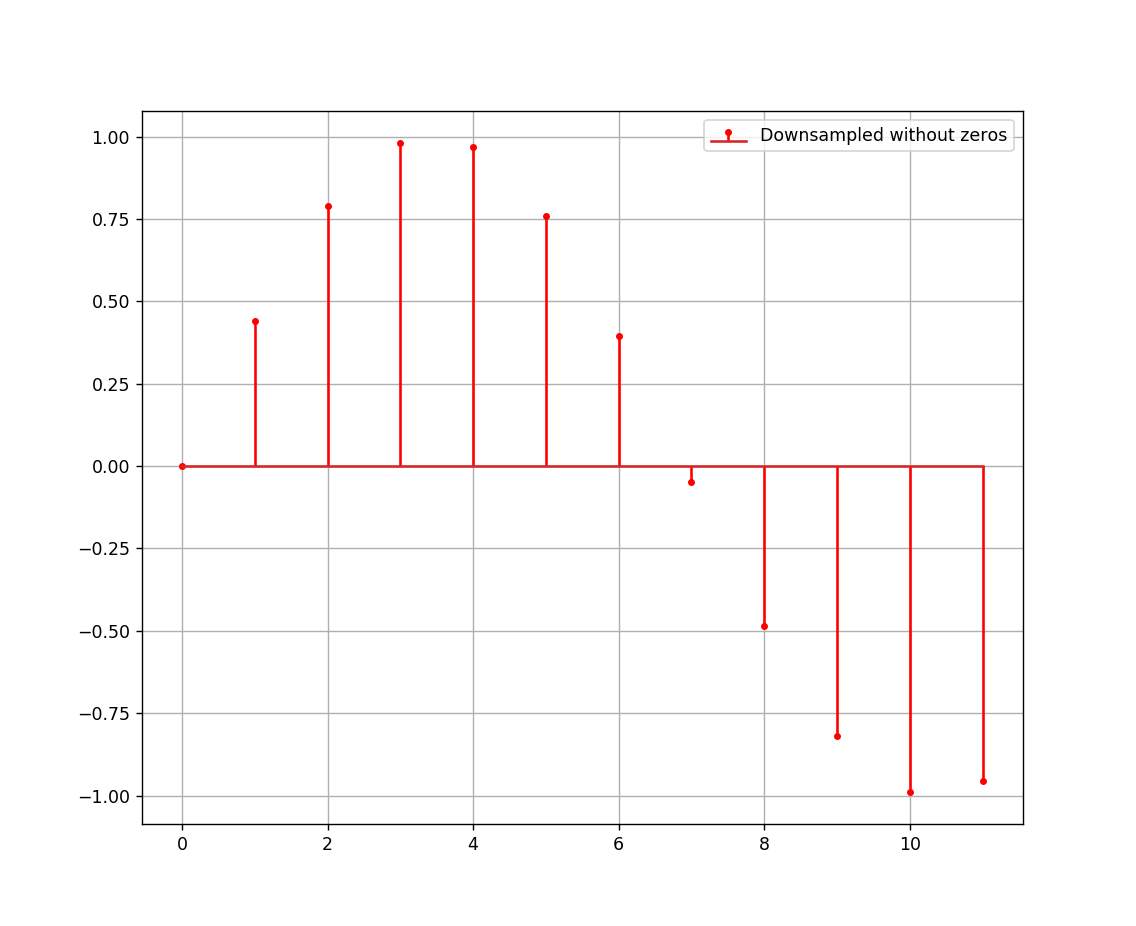

In [19]:
sd = sdu[0:44100:8]
plt.figure(figsize=(10,8))
plt.stem(sd[0:int(100/8)],linefmt='r',markerfmt='r.', use_line_collection=True, label='Downsampled without zeros')
plt.legend()
plt.grid();

We can now take a look at the spectrum with :

<IPython.core.display.Javascript object>


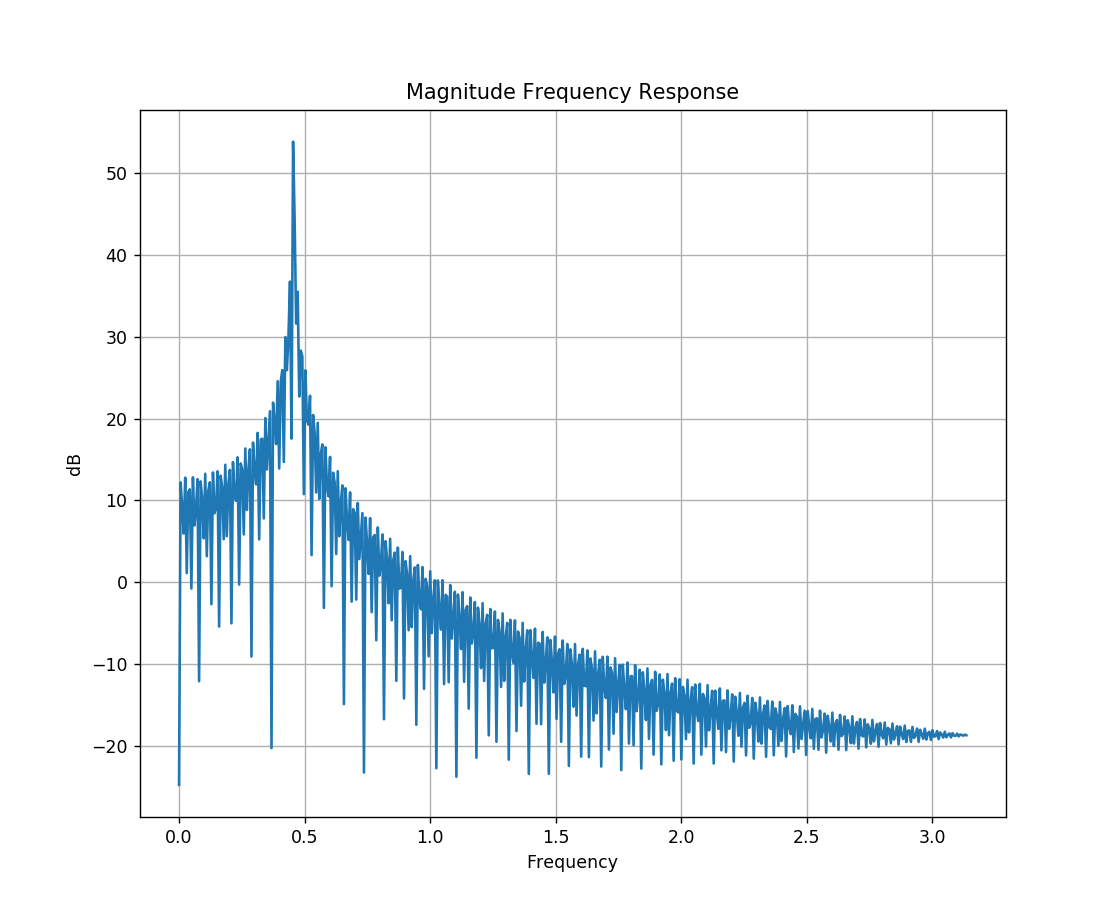

In [20]:
w,H=freqz(sd)
plt.figure(figsize=(10,8))
plt.plot(w, 20*np.log10(abs(H)+1e-3))
plt.xlabel('Frequency')
plt.ylabel('dB')
plt.title('Magnitude Frequency Response')
plt.grid()

Observe that the sine signal now appear at normalized frequency of 0.455, a **factor of 8 higher** than before, with the zeros in it, because we **reduced the sampling rate by 8**. 

This is because we now have a new Nyquist frequency of 22050/8 now, hence our normalized frequency becomes $400*3.14 / 22050 * 8 \approx 0.455$. This means removing the zeros scales or stretches our frequency axis.

    
Observe that in our time-domain plot, we only have $100/8 \approx12$ samples left.

How are the frequency responses or spectra of $y(m)$ and $x^d(n)$ connected? 

We can simply take the Fourier transforms of them,

$$ \large
X^d (\Omega)=\sum _ {n=- \infty}^ \infty x^d (n) \cdot  e^{-j \Omega n} 
$$

still with the zeros in it. Hence most of the sum contains only zeros. Now we only need to let the sum run over the non-zeros entries (only every Nth entry), by replacing n by mN, and we get

$$ \large
X^d (\Omega)=\sum _ {n=mN} x^d (n) \cdot  e^{-j \Omega n} 
$$

for all integer m, now without the zeros. Now we can make the connection to the Fourier transform of y(m), by making the index substitution m for n in the sum,


$$ \large
X^d (\Omega)= \sum _{m=- \infty} ^ \infty y(m) \cdot  e^{-j \Omega \cdot N m} = Y(\Omega \cdot N) 
$$

This is now our result. It shows that the downsampled version (with the removal of the zeros), has the same frequency response, but the frequency variable $\Omega$ is scaled by the factor N. 

For instance, the normalized frequency $\pi /N$ before downsampling becomes $\pi$ after removing the zeros! It shows that a small part of the spectrum before downsampling becomes the full usable spectrum after downsampling.

Observe that we don't loose any frequencies this way, because by looking at eq. (1) we see that we obtain multiple copies of the spectrum in steps of $2\pi /N$, and hence the spectrum already has a periodicity of $2\pi /N$. This means that the spectrum between $-\pi/N$ and $\pi/N$ for instance (we could take any period of length $2\pi /N$) contains a unique and full part of the spectrum, because the rest is just a periodic continuation. 

This can be seen in following pictures,

<center>
    <img src='./images/lecture6-6.PNG'>
    Figure: The magnitude spectrum of a signal. The 2 boxes symbolize the passband of an ideal bandpass, here a high pass.
    <img src='./images/lecture6-8.PNG'>
    Figure: The signal spectrum after passing through the high pass. 
    <img src='./images/lecture6-7.PNG'>
    Figure: Signal spectrum after multiplication with the unit pulse train, for N=2, hence setting every second value to zero (the zeros still in the sequence). Observe that we shift and add the signal by multiples of $2\pi /2=\pi$, and in effect we obtain „mirrored“ images of the high frequencies to the low frequencies (since we assume a real valued signal). Observe that the mirrored spectra and the original spectrum don't overlap, which makes reconstruction easy.
    <img src='./images/lecture6-9.PNG'>
    Figure: Signal spectrum after downsampling (removing the zeros) by N (2 in this example). Observe the stretching of the spectrum by a factor of 2. 
</center>

## Upsampling

In [46]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/Ow_FOJS82gc" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

What is still missing in our system is the upsampling, as the opposite operation of downsampling, for the case where we would like to increase our sampling rate. One of the first (**wrong!**) approaches to upsampling that often comes to mind if we want to do upsampling by a factor of N, is to simply repeat every sample N-1 times. 

**But** this is equivalent to first inserting N-1 zeros after each sample, and then filter the resulting sequence by a **low pass** filter with an impulse response of N ones. This is a very special case, and we would like to have a more general case. 

In our case, we actually a high pass filter, not a low pass. Hence we assume that we upsample by always first inserting N-1 **zeros** after each sample, and then have some interpolation filter for it (can also be a **high or band pass**, as needed to reconstruct a signal).

Again we take the signal at the lower sampling rate as $y(m)$, with index m for the lower sampling rate, and the signal at the higher sampling rate, with the zeros in it, as $x^d(n)$ with index n for the higher sampling rate. Here we can see that this is simply the reverse operation of the final step of removing the zeros for the downsampling.

Hence we can take our result from downsampling and apply it here:

$$X^d(\Omega)=Y(\Omega \cdot N)$$
$$or$$
$$X^d(\Omega /N)=Y(\Omega )$$

We are now just coming from y(m), going to the now upsampled signal $x^d(n)$.

For instance if we had the frequency $\pi$ before upsampling, it becomes $\pi /2$ for the upsampled signal, if we have N=2. In this way we now get an „extended“ frequency range.

Since we now have again the signal including the zeros, $x^d(n)$, we again have the periodic spectrum, as before, as we progress through the same steps backwards now. We can also see that the result of upsampling is periodic in frequency, because the signal was $2\pi$ periodic before upsampling anyway, and after upsampling the  frequency scale replaces $2\pi \cdot N$ by $2\pi$. 

## Reconstruction

In [48]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/bIYXoAUISNs" frameborder="0" allow="accelerometer; gyroscope; picture-in-picture" allowfullscreen></iframe>

Observe that if the **aliasing components don't overlap**, we can **perfectly reconstruct** the signal by using a suitable filter. We can make sure that they don't overlap by **filtering** the signal at the **higher sampling rate**, before they can overlap (as we did in our high pass example). If they already overlap at the lower sampling rate, it would be too late to separate the different components, the signal would already be „destroyed“.

We can perfectly reconstruct the high pass signal in our example if we use ideal filters, using upsampling and ideal high pass filtering.

In this way we have for the analysis and synthesis the following picture:

<center>
    <br>
    <img src='./images/lecture6-10.PNG'>
</center>

Observe that we violate the conventional Nyquist criterium, because our high pass passes the high frequencies. But then the sampling mirrors those frequencies to the lower range, such that we can apply the traditional Nyquist sampling theorem. This method is also known as bandpass Nyquist. This is an important principle for filter banks and wavelets. It says that we can perfectly reconstruct a bandpass signal in a filter bank, if we sample with twice the rate as the **bandwidth** of our bandpass signal (assuming ideal filters, to avoid spectral overlap of aliasing components).

In genereal this is true for **complex** filters.<br>
For **real** valued filters observe that this simple assumption only works if we have bandpass filters which start at frequencies $\pi/N\cdot k$(integer k) .  Otherwise we could have overlap to the aliased components!

**Example:** We have a real valued bandpass filter which starts its passband at $\epsilon$ and ends at $\epsilon+\pi /N$(since it is real values the the passband also appears at the same negative frequencies, $-\epsilon$ to $-\epsilon-\pi /N$). After multiplication with the unit pulse train, we get one (out of N) aliasing component by shifting the negative passband by $2\pi /N$ to the positive frequencies, which results in the range of $\pi / N-\epsilon$ to $2\pi /N-\epsilon$. Hence we have an overlap from $\pi / N-\epsilon$ to $\pi/N+\epsilon$ and we could not perfectly reconstruct our signal!

Hence, sampling of twice the bandwidth for real valued signals and filters only works if the bandwidth are aligned with $\pi /N \cdot k$. What could we do otherwise to avoid overlapping aliasing components? We could simply increase the sampling rate, for instance to twice the usual sampling rate (4 times the bandwidth), to have a "safety margin".

Another possibility would be to shift the bandpass signals in frequency, such that they are now aligned with the above mentioned grid.

Observe that this restriction is not needed for complex signals or filter banks. That is also why complex filter banks are used for instance in acoustic echo cancellation, because there the sampling rate can be increased by a certain fraction (less than a factor of 2) to reduce aliasing artifacts, and still have a lower complexity.

<center>
    <br>
    <img src='./images/lecture6-11.PNG'>
</center>

**Summary:** if our band boarders are alligned with multiples of $\pi/N$ then we can donwsample by N, otherwise we are on the safe side by using N/2 as downsampling rate for real valued signals.  For complex signals we can always downsample by N, regardles of the exact placement of the bandpass filter.

Compare with the standard Nyquist case: here we have a lowpass signal which we downsample and reconstruct:
<center>
    <img src='./images/lecture6-12.PNG'>
</center>

## Python Example: Live Spectrogram: Sampling, LP Filtering

In [49]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/6WJQ3KCBN7w" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [21]:
# Imports and Configuration

import pyaudio
import numpy as np
import scipy.signal as signal
import struct
import matplotlib.pyplot as plt
from matplotlib.mlab import window_hanning,specgram
from matplotlib.colors import LogNorm
from matplotlib.ticker import FuncFormatter, MultipleLocator
from ipywidgets import ToggleButton, Checkbox, Button
from ipywidgets import HBox, interact
import threading

In [22]:
CHUNK_SIZE = 2048 #Blocksize
CHANNELS = 1 # Audio Channes
RATE = 32000  #Sampling Rate in Hz
N=8.0     #Downsampling/Upsampling Rate
FORMAT = pyaudio.paInt16 #conversion format for PyAudio stream
NFFT = 1024 #NFFT value for spectrogram
OVERLAP = 512 #overlap value for spectrogram

In [23]:
# LP Filter
[b,a]=signal.iirfilter(8, 1900.0/16000,rp=60,btype='lowpass')
#Memory for the filter:
zd=np.zeros(8)
zu=np.zeros(8)
LPFilterOn=False

In [24]:
# Function to Plot Spetrogram
SamplingOn=False # Turn Donwsampling/Upsampling On/Off
ctr=0 # Control for plotting
def run_spectrogram(toggle_run):
    global zd, zu, ctr, SamplingOn, LPFilterOn
    while(True):
        if toggle_run.value==True:
            break
            
        #Reading from audio input stream into data with block length "CHUNK":
        data_stream = stream.read(CHUNK_SIZE)
        shorts = (struct.unpack( 'h' * CHUNK_SIZE, data_stream ));
        samples=np.array(list(shorts),dtype=float);

        #start block-wise signal processing:
        #Low pass filter *before downsampling*:
        if LPFilterOn==True:
            [samples,zd]=signal.lfilter(b, a, samples, zi=zd)

        #Compute a block/an array of a unit pulse train corresponding a downsampling rate of N:
        #make unit pulse train with modulus function "%": 
        s=(np.arange(0,CHUNK_SIZE)%N)==0
        #The sampling:
        #multiply the signal with the unit pulse train:
        if SamplingOn == True:
            samples=samples*s;


        #Lowpass filtering *after upsampling*:
        #filter function:
        if LPFilterOn==True:
            [samples,zu]=signal.lfilter(b, a, samples, zi=zu)

        #end signal processing

        #play out samples:
        samples=np.clip(samples, -32000,32000)
        samples=samples.astype(int)
        #converting from short integers to a stream of bytes in "data":
        data=struct.pack('h' * len(samples), *samples);
        #Writing data back to audio output stream: 
        stream.write(data, CHUNK_SIZE)

        # Update Plot
        if (ctr%4 ==0):
            arr2D,freqs,bins = specgram(samples,window=window_hanning,
                                        Fs = RATE,NFFT=NFFT,noverlap=OVERLAP)
            im_data = im.get_array()
            if ctr < 16:
                im_data = np.hstack((im_data,arr2D))
                im.set_array(im_data)
            else:
                keep_block = arr2D.shape[1]*(16 - 1)
                im_data = np.delete(im_data,np.s_[:-keep_block],1)
                im_data = np.hstack((im_data,arr2D))
                im.set_array(im_data)
            fig.canvas.draw()
        ctr+=1

In [25]:
# GUI
toggle_run = ToggleButton(description='Stop')
button_start= Button(description='Start')
box_sampling = Checkbox(False, description='Downsampling/Upsampling')
box_LPFilter = Checkbox(False, description='LP Filters')

def start_button(button_start):
    thread.start()
    button_start.disabled=True
button_start.on_click(start_button)


def on_click_toggle_run(change):
    if change['new']==False:
        stream.stop_stream()
        stream.close()
        p.terminate()
        plt.close()
toggle_run.observe(on_click_toggle_run, 'value')

def box_samping_changed(box_sampling):
    global SamplingOn
    if box_sampling['new']: 
        SamplingOn=True
    else:
        SamplingOn=False       
box_sampling.observe(box_samping_changed, names='value')

def box_LPFilter_changed(box_LPFilter):
    global LPFilterOn
    if box_LPFilter['new']: 
        LPFilterOn=True
    else:
        LPFilterOn=False       
box_LPFilter.observe(box_LPFilter_changed, names='value')

box_buttons = HBox([button_start,toggle_run])
box_checkbox = HBox([box_sampling,box_LPFilter])

In [26]:
# Create a Thread for run_spectrogram function
thread = threading.Thread(target=run_spectrogram, args=(toggle_run,))

In [27]:
# Start Audio Stream
# Create 
p = pyaudio.PyAudio()
    
stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                output=True,
                frames_per_buffer=CHUNK_SIZE)



input_data = stream.read(CHUNK_SIZE)
samples = np.frombuffer(input_data,np.int16)

<IPython.core.display.Javascript object>


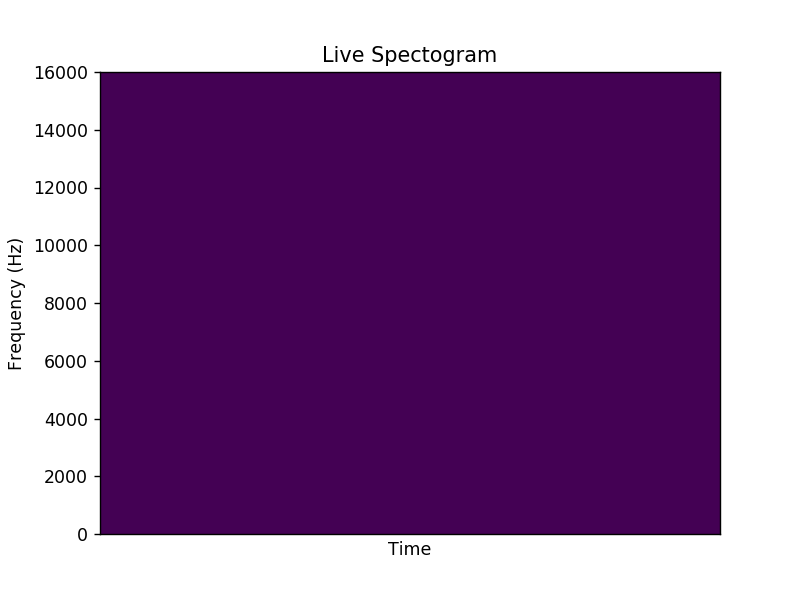

In [28]:
# Initialize Plot and Display GUI

display(box_buttons)
display(box_checkbox)

fig, ax = plt.subplots()
arr2D,freqs,bins = specgram(samples,window=window_hanning,
                                Fs = RATE,NFFT=NFFT,noverlap=OVERLAP)


extent = (bins[0],bins[-1]*32,freqs[-1],freqs[0])
im = plt.imshow(arr2D,aspect='auto',extent = extent,interpolation="none",
                     norm = LogNorm(vmin=.01,vmax=1))
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.title('Live Spectogram')
plt.gca().invert_yaxis()
plt.xticks([])

def handle_close(evt):
    # When everything done, release the capture
    stream.stop_stream()
    stream.close()
    p.terminate()
    plt.close()
plt.connect('close_event', handle_close);